In [1]:
import csv 
import os
import numpy as np
import random
from sklearn.metrics import roc_curve
import math
from matplotlib import pyplot
import datetime
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.signal import find_peaks
import plotly.graph_objects as go
from scipy import fft
from scipy import signal as sig
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from numpy import arange
from math import sqrt
from numpy import argmax
import random as rn
import h2o
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.metrics import precision_recall_curve
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft

In [2]:
df = pd.read_csv("F://phd//URC data//112_UCR_Anomaly_BIDMC1_2500_5400_5600.csv")
scaler = preprocessing.StandardScaler()
trainX=df[0:2500]
testX=df[5000:6000]
testXo=testX
#trainX=scaler.fit_transform(trainX)
#testX=scaler.fit_transform(testX)

In [3]:
dftotal = pd.DataFrame(trainX) 

dftotal.insert(0, 'id', range(1, 1 + len(dftotal)))

dftest = pd.DataFrame(testX) 

dftest.insert(0, 'id', range(1, 1 + len(dftest)))


<Figure size 3600x3600 with 0 Axes>

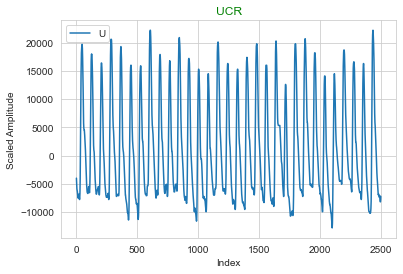

In [4]:
UCR = DataFrame(dftotal.values[:,0:2])
Utest = DataFrame(dftest.values[:,0:2])
residuals = pd.DataFrame(UCR.values[:,1:2])
restest = pd.DataFrame(Utest.values[:,1:2])
plt.figure( figsize=(50, 50) )
residuals.plot()
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("UCR", color='green')
plt.legend('UCR')
plt.show()




In [5]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 15 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_khattab_m77top
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.731 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [6]:
levelframe= h2o.H2OFrame(np.nan_to_num(residuals))

testframe= h2o.H2OFrame( np.nan_to_num(restest))


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:

powerres = levelframe
predictors =powerres.col_names
predictors2 =testframe.col_names
print(predictors,predictors2)
eif = H2OExtendedIsolationForestEstimator(ntrees =300,
                                          sample_size = 26)

eif.train(x = predictors, training_frame = powerres)
eif_result = eif.predict(testframe.fillna())


anomaly_score = eif_result["anomaly_score"]
print(len(anomaly_score))

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]



['C1'] ['C1']
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
1000


In [8]:
dd=h2o.as_list(anomaly_score)
ff = np.zeros(len(testX))
for i in range(400, 600):
    ff[i]=1
ff=h2o.as_list(h2o.H2OFrame(ff))
fpr, tpr, thresholds = roc_curve(ff["C1"],dd)

print(roc_auc_score( ff["C1"],dd))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
0.5081125
Threshold value is: 0.4231686983487564


In [9]:
testlevel=pd.DataFrame(ff["C1"],columns=["C1"])
typlevel=pd.DataFrame(dd,columns=["mean_length"])
optimal_cond=optimal_threshold



for j in range(len(typlevel)):
 #typlevel[j]["mean_length"] 
 if typlevel["mean_length"][j]>=optimal_threshold:
   typlevel["mean_length"][j]=1
 else:
   typlevel["mean_length"][j]  = 0


In [10]:
from sklearn.metrics import f1_score
score = f1_score (np.array(testlevel.values[:]),np.array(typlevel.values[:]), average='macro')
score2=accuracy_score(np.array(testlevel.values[:]),np.array(typlevel.values[:]), normalize=True)
score3=accuracy_score(np.array(testlevel.values[:]),np.array(typlevel.values[:]), normalize=False)
print('F1 Score: %.3f' % score)
print('accuracy_score normalize: %.3f' % score2)
print('accuracy_score not normalize: %.3f' % score3)


F1 Score: 0.444
accuracy_score normalize: 0.800
accuracy_score not normalize: 800.000


In [11]:
#testXo.insert(0, 'id', range(1, 1 + len(testXo)))
x=(testXo.values[:,0:1])
y=(testXo.values[:,1:2])
z=typlevel

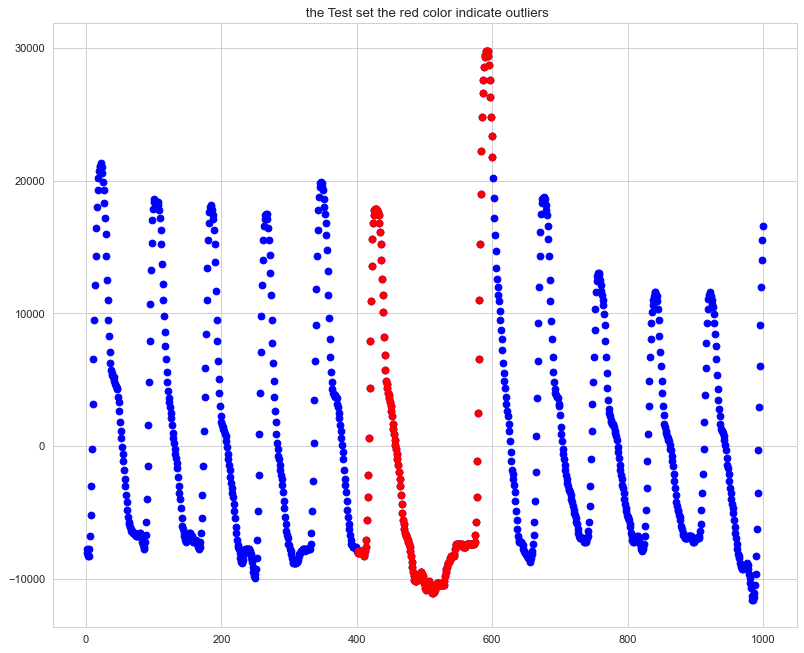

In [12]:
r=ff
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')

plt.scatter(x[r[:]>=1],y[r[:]>=1],c='red')

plt.title(' the Test set the red color indicate outliers')
plt.show()


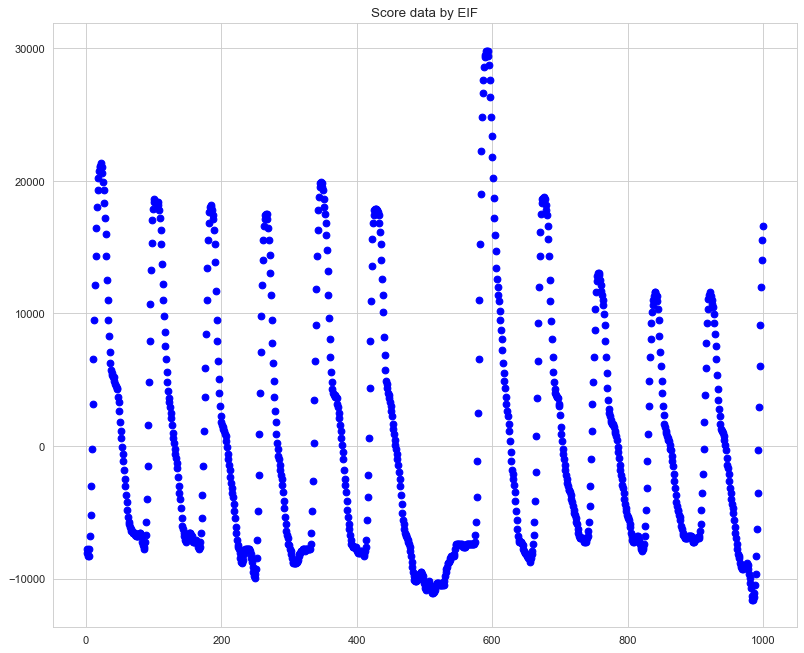

In [13]:
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y.flatten(),color='blue')
plt.scatter(x[z[:]>optimal_threshold/10],y[z[:]>optimal_threshold/10],c='red')

plt.title('Score data by EIF')
plt.show()
